   Year Month  Value
0  2000   Jan      1
1  2000   Feb      2
2  2000   Mar      3
3  2001   Jan      4
4  2001   Feb      5
5  2001   Mar      6
6  2002   Jan      7
7  2002   Feb      8
8  2002   Mar      9


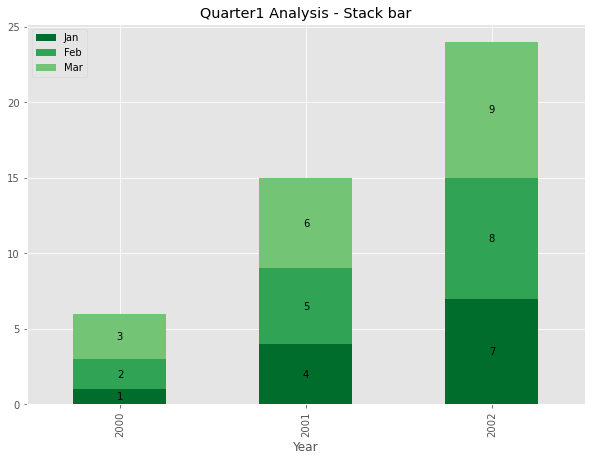

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.style.use('ggplot')

data = [[2000, 2000, 2000, 2001, 2001, 2001, 2002, 2002, 2002],
        ['Jan', 'Feb', 'Mar', 'Jan', 'Feb', 'Mar', 'Jan', 'Feb', 'Mar'],
        [1, 2, 3, 4, 5, 6, 7, 8, 9]]

rows = zip(data[0], data[1], data[2])
headers = ['Year', 'Month', 'Value']
df = pd.DataFrame(rows, columns=headers)
print(df)

fig, ax = plt.subplots(figsize=(10,7))  

months = df['Month'].drop_duplicates()
margin_bottom = np.zeros(len(df['Year'].drop_duplicates()))
colors = ["#006D2C", "#31A354","#74C476"]

for num, month in enumerate(months):
    values = list(df[df['Month'] == month].loc[:, 'Value'])
    df[df['Month'] == month].plot.bar(x='Year',y='Value', ax=ax, stacked=True, 
                                    bottom = margin_bottom, color=colors[num], label=month)
    margin_bottom += values

list_values = (df['Value'].tolist()[0::3] 
                + df['Value'].tolist()[1::3] 
                + df['Value'].tolist()[2::3])
for rect, value in zip(ax.patches, list_values):
    h = rect.get_height()/2
    w = rect.get_width()/2
    x, y = rect.get_xy()
    ax.text(x+w, y+h,value,horizontalalignment='center',verticalalignment='center')
plt.title('Quarter1 Analysis - Stack bar')    
plt.show()